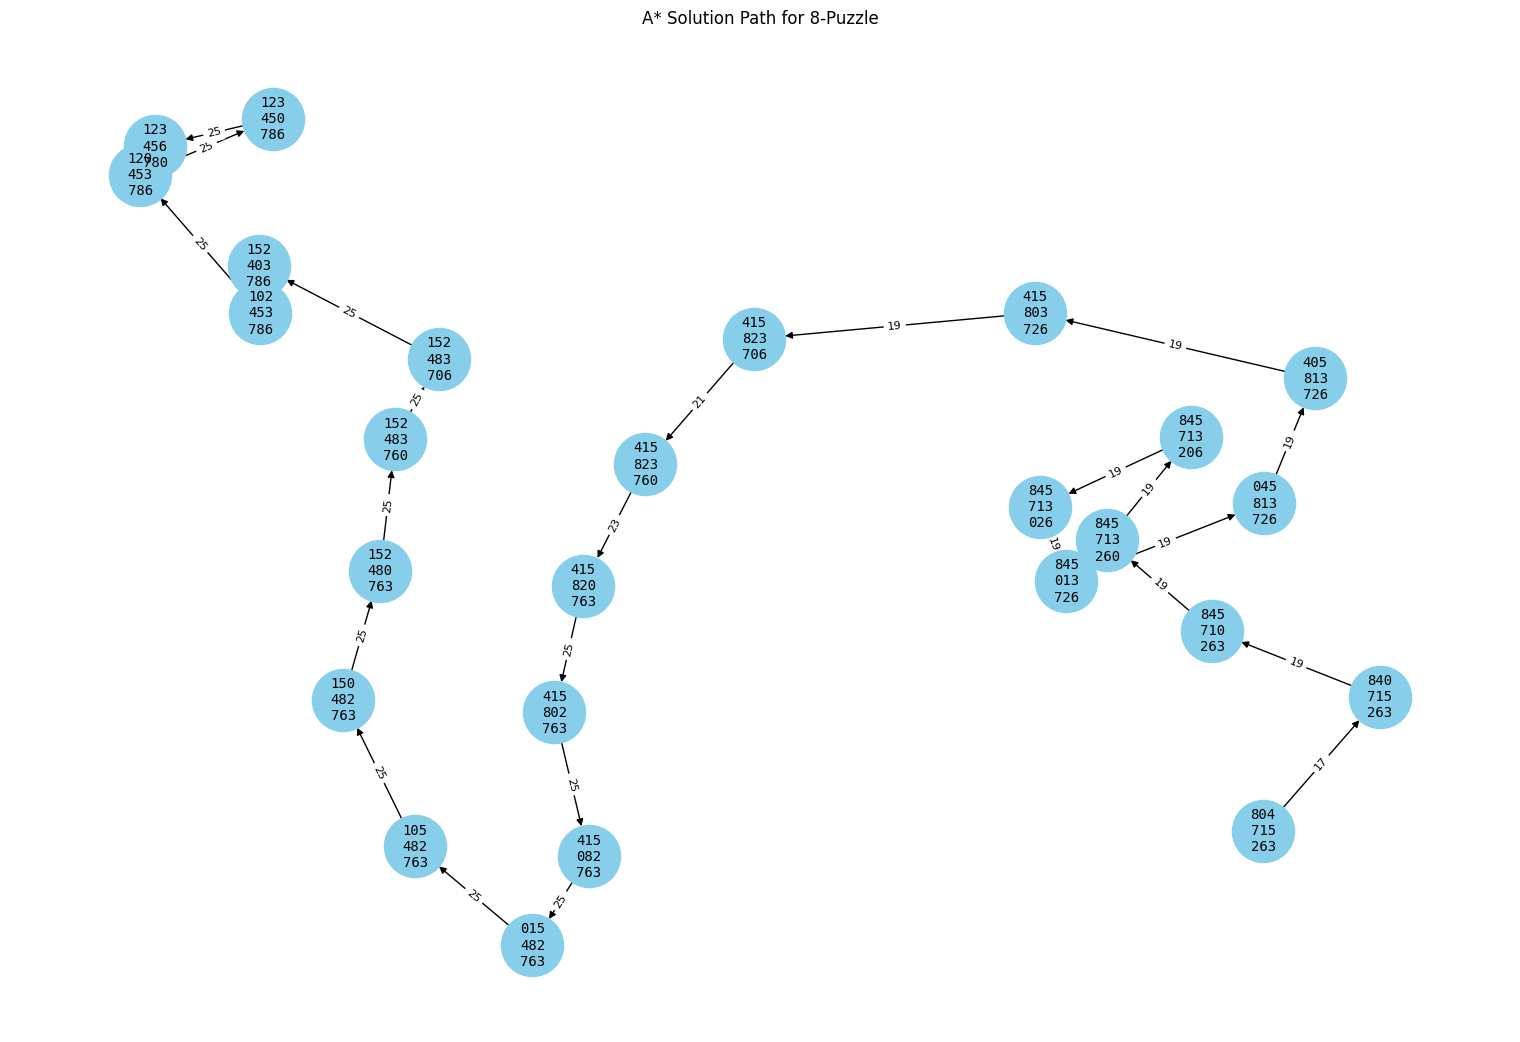

{0,1}
8 0 4
7 1 5
2 6 3

{0,2}
8 4 0
7 1 5
2 6 3

{1,2}
8 4 5
7 1 0
2 6 3

{2,2}
8 4 5
7 1 3
2 6 0

{2,1}
8 4 5
7 1 3
2 0 6

{2,0}
8 4 5
7 1 3
0 2 6

{1,0}
8 4 5
0 1 3
7 2 6

{0,0}
0 4 5
8 1 3
7 2 6

{0,1}
4 0 5
8 1 3
7 2 6

{1,1}
4 1 5
8 0 3
7 2 6

{2,1}
4 1 5
8 2 3
7 0 6

{2,2}
4 1 5
8 2 3
7 6 0

{1,2}
4 1 5
8 2 0
7 6 3

{1,1}
4 1 5
8 0 2
7 6 3

{1,0}
4 1 5
0 8 2
7 6 3

{0,0}
0 1 5
4 8 2
7 6 3

{0,1}
1 0 5
4 8 2
7 6 3

{0,2}
1 5 0
4 8 2
7 6 3

{1,2}
1 5 2
4 8 0
7 6 3

{2,2}
1 5 2
4 8 3
7 6 0

{2,1}
1 5 2
4 8 3
7 0 6

{1,1}
1 5 2
4 0 3
7 8 6

{0,1}
1 0 2
4 5 3
7 8 6

{0,2}
1 2 0
4 5 3
7 8 6

{1,2}
1 2 3
4 5 0
7 8 6

{2,2}
1 2 3
4 5 6
7 8 0



In [153]:
import heapq
from collections import deque
import matplotlib.pyplot as plt
import networkx as ntx

visited = {}
pq = []
r = deque()


def hn(s: str) -> int:
    res = 0
    for i in range(3):
        for j in range(3):
            if s[i * 3 + j] != "0":
                val = int(s[i * 3 + j]) - 1
                res += abs(val // 3 - i) + abs(val % 3 - j)
    return res


def find_zero(s: str):
    for i in range(3):
        for j in range(3):
            if s[i * 3 + j] == "0":
                return (i, j)
    return (-1, -1)


def make_result(now: str):
    while now[0] != "9":
        r.appendleft(now)
        now = visited[now][0]


def show_result(G: any):

    path_nodes = list(r)
    subG = G.subgraph(path_nodes)
    plt.figure(figsize=(15, 10))
    pos = ntx.spring_layout(subG, k=3.0, iterations=200, scale=3.0)
    labels = {}
    for node in subG.nodes():
        state = node
        formatted = "\n".join([state[i : i + 3] for i in range(0, 9, 3)])
        labels[node] = formatted
    ntx.draw(
        subG,
        pos,
        labels=labels,
        with_labels=True,
        node_color="skyblue",
        node_size=2000,
        font_size=10,
        arrows=True,
        font_family="monospace",
    )
    edge_labels = ntx.get_edge_attributes(subG, "weight")
    ntx.draw_networkx_edge_labels(subG, pos, edge_labels=edge_labels, font_size=8)

    plt.title("A* Solution Path for 8-Puzzle")
    plt.axis("off")
    plt.show()

    while r:
        top = r.popleft()
        zero = find_zero(top)
        print(f"{{{zero[0]},{zero[1]}}}")
        for i in range(3):
            print(" ".join(top[i * 3 + j] for j in range(3)))
        print()


def main():

    G = ntx.DiGraph()
    xy = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    result = "123456780"
    s = "804715263"
    is_can = 0

    for i in range(8):
        for j in range(i + 1, 9):
            if s[i] == "0" or s[j] == "0":
                continue
            if s[i] > s[j]:
                is_can += 1
    if is_can % 2:
        print("can't find for Inversion count.")
        return

    start_h = hn(s)
    heapq.heappush(pq, (start_h, 0, s, "Root"))
    visited[s] = ("9", 0)

    while pq:
        f, g, now_state, before = heapq.heappop(pq)

        if now_state == result:
            make_result(result)
            show_result(G)
            return

        zero = find_zero(now_state)
        for dx, dy in xy:
            nx, ny = zero[0] + dx, zero[1] + dy
            if not (0 <= nx <= 2 and 0 <= ny <= 2):
                continue
            next_list = list(now_state)
            next_list[zero[0] * 3 + zero[1]], next_list[nx * 3 + ny] = (
                next_list[nx * 3 + ny],
                "0",
            )
            next_string = "".join(next_list)

            g2 = g + 1
            f2 = g2 + hn(next_string)

            if next_string not in visited or visited[next_string][1] > g2:
                visited[next_string] = (now_state, g2)
                heapq.heappush(pq, (f2, g2, next_string, now_state))
                G.add_node(next_string)
                G.add_edge(now_state, next_string, weight=f2)

    print("can't find")


if __name__ == "__main__":
    main()
